In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('listings.csv')

In [0]:
df.head()

In [3]:
del df['name']
del df['id']
del df['host_id']
del df['host_name']
del df['last_review']
del df['reviews_per_month']

In [0]:
df.info()
df.describe()

In [0]:
df.corr()

In [0]:
df.isnull().sum()

In [4]:
from sklearn.preprocessing import LabelEncoder
bins = [0, 200, np.inf]
names = ['LE200', 'GT200']
lb_make = LabelEncoder()
df["neighbourhood_group_code"] = lb_make.fit_transform(df["neighbourhood_group"])
#lb_make.fit_transform(df["neighbourhood_group"])

df["neighbourhood_code"] = lb_make.fit_transform(df["neighbourhood"])
#lb_make.fit_transform(df["neighbourhood"])

df["room_type_code"] = lb_make.fit_transform(df["room_type"])
#lb_make.fit_transform(df["room_type"])

#df["price_bin"] = pd.cut(df['price'],50)
#df['price_bin'] = df['price_bin'].cat.codes

#df["price_category"] = pd.cut(df['price'],bins,labels=names)

df["price_bin_2"] = np.where(df["price"]<=200,1,0)


df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_code,neighbourhood_code,room_type_code,price_bin_2
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2,288,2,128,0,0
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,2,95,1,1
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,1,212,1,41,0,1
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,2,62,0,1
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,1,127,2,138,0,1


In [135]:
df['price_bin_2'].value_counts()
#delete this, too many imbalanced labels

1    40509
0     8355
Name: price_bin_2, dtype: int64

In [5]:
del df['price']
del df['neighbourhood_code']
del df['room_type']
del df['neighbourhood']
del df['neighbourhood_group']

In [46]:
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_code,room_type_code,price_bin_2
0,40.75362,-73.98377,1,46,2,288,2,0,0
1,40.80902,-73.94190,3,0,1,365,2,1,1
2,40.68514,-73.95976,1,274,1,212,1,0,1
3,40.79851,-73.94399,10,9,1,0,2,0,1
4,40.74767,-73.97500,3,75,1,127,2,0,1


In [0]:
df.dtypes

In [153]:
df['price_bin_2'].value_counts()

1    40509
0     8355
Name: price_bin_2, dtype: int64

In [0]:
#plot neighbourhood_code
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
x1= df['neighbourhood_group_code']

ax = sns.countplot(x1);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [0]:
#plot price
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
x1= df['price_bin_2']

ax = sns.countplot(x1);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [7]:
from sklearn.model_selection import train_test_split
Xig = np.array(df.iloc[:, df.columns != 'price_bin_2'])
yig = np.array(df.iloc[:, df.columns == 'price_bin_2'])


X_train,X_test,y_train,y_test = train_test_split(Xig, yig, test_size=0.2, random_state=123)
                         
print(Xig.shape)
print(yig.shape)
print("===========")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48864, 8)
(48864, 1)
(39091, 8)
(39091, 1)
(9773, 8)
(9773, 1)


In [8]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


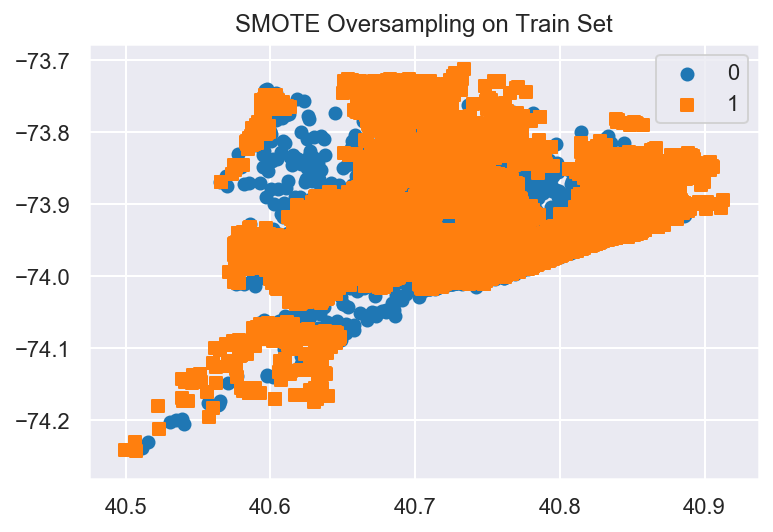

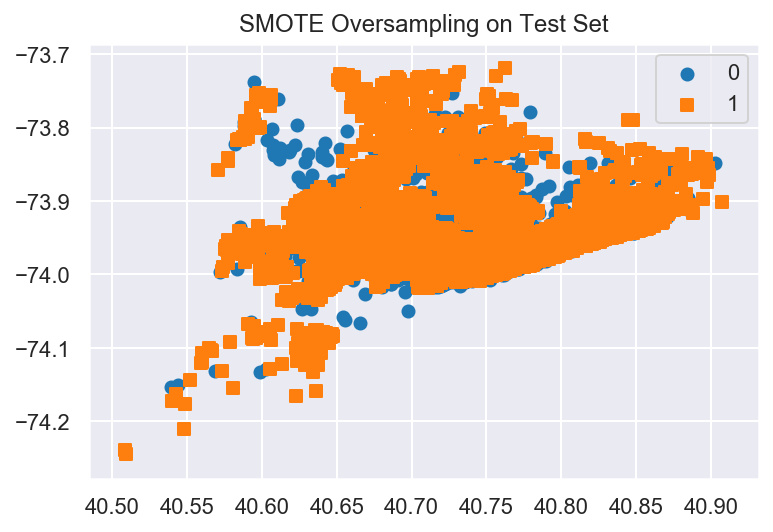

In [9]:
#upsampling the 200+ samples to balance the set,https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
#default strategy is auto == not majority.
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=101)
X_train_sm, y_train_sm = smt.fit_sample(X_train,y_train)
X_test_sm,y_test_sm= smt.fit_sample(X_test,y_test)

plot_2d_space(X_train_sm, y_train_sm,'SMOTE Oversampling on Train Set');
plot_2d_space(X_test_sm, y_test_sm,'SMOTE Oversampling on Test Set');

In [13]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test_sm.shape)
print(y_test_sm.shape)

(64808, 8)
(64808,)
(16210, 8)
(16210,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_sm)
X_train_sm = scaler.transform(X_train_sm)

scaler.fit(X_test_sm)
X_test_sm = scaler.transform(X_test_sm)


In [12]:
from sklearn.decomposition import PCA
import collections
pca = PCA()
#PCA on X_train_sm set
pca.fit(X_train_sm)

#Print the eigenvalues from the PCA
print(pca.explained_variance_)

X_train_PCA = pca.transform(X_train_sm)
print("original shape:   ", X_train_sm.shape)
print("transformed shape:", X_train_PCA.shape)

X_test_PCA = pca.transform(X_test_sm)
print("original shape:   ", X_test_sm.shape)
print("transformed shape:", X_test_PCA.shape)
collections.Counter(y_train_sm)

[1.54713484 1.33923112 1.18829872 1.02754944 0.87488354 0.7414316
 0.67471597 0.60687821]
original shape:    (64808, 8)
transformed shape: (64808, 8)
original shape:    (16210, 8)
transformed shape: (16210, 8)


Counter({1: 32404, 0: 32404})

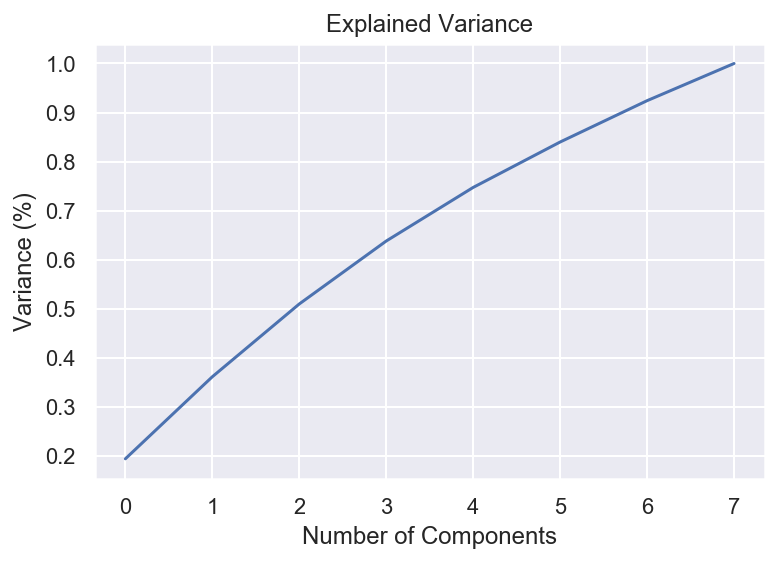

In [56]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
import collections, numpy

classifier = RandomForestClassifier()
classifier.fit(X_train_sm, y_train_sm)

y_pred = classifier.predict(X_test_sm)


collections.Counter(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Counter({0: 10869, 1: 5341})

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


cm = confusion_matrix(y_test_sm, y_pred)
print(cm)
print("Accuracy", accuracy_score(y_test_sm, y_pred))

print(classifier.feature_importances_)
#geo location, rental type , neighbourhood ~=70% variance explained
#upsampling created equal partitions, did not maintain the class weights/% , hence the linearity in the explained variance by cimponents curve

[[7700  405]
 [3169 4936]]
Accuracy 0.7795188155459593
[0.13995892 0.20612462 0.07680548 0.08992904 0.05224737 0.084525
 0.12817529 0.22223427]


In [16]:
from sklearn import svm
from sklearn.metrics import average_precision_score

classifier = svm.LinearSVC()
classifier.fit(X_train_sm, y_train_sm)
y_score = classifier.decision_function(X_test_sm)

average_precision = average_precision_score(y_test_sm, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

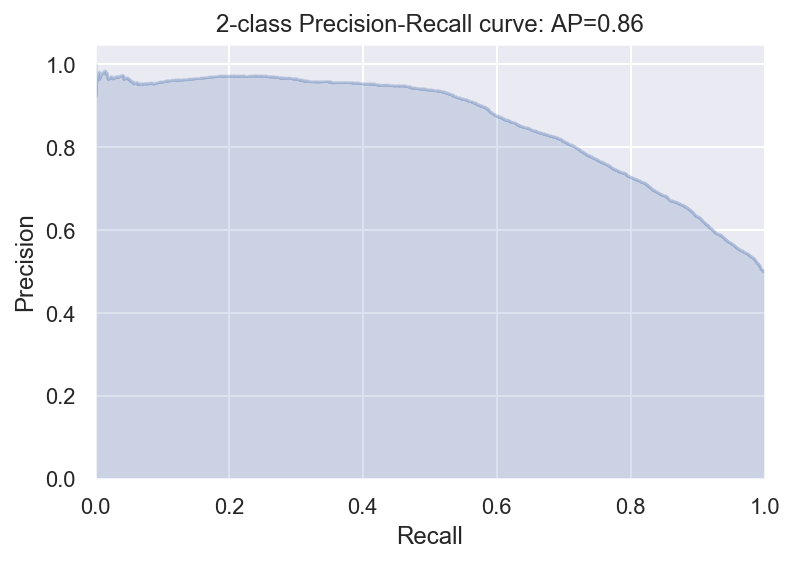

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test_sm, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [0]:
'''
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
targets = df['price_bin_2']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['price_bin_2'] == target
    ax.scatter(final.loc[indicesToKeep, 'PC1']
               , final.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
'''

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

#Stratified Shuffle Split
seed=1234
S =10
skf = StratifiedKFold(n_splits=S,shuffle=True,random_state=seed)

print(cv_object)                         
print(skf)




ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)
StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


if 'price_bin_2' in df:
    y = df['price_bin_2'].values # get the labels we want
    X = df.iloc[:, df.columns != 'price_bin_2'].values # use everything else to predict!

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='liblinear' ) # get object
iter_num=0

#stratified shuffle split after performing minority upsampling with SMOTE
for train_indices, test_indices in skf.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    

    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1


====Iteration 0  ====
accuracy 0.6388377327603847
confusion matrix
 [[ 742   94]
 [1671 2380]]


====Iteration 1  ====
accuracy 0.6386331082463679
confusion matrix
 [[ 725  111]
 [1655 2396]]


====Iteration 2  ====
accuracy 0.6410886024145692
confusion matrix
 [[ 740   96]
 [1658 2393]]


====Iteration 3  ====
accuracy 0.649682832003274
confusion matrix
 [[ 742   94]
 [1618 2433]]


====Iteration 4  ====
accuracy 0.6451810926949049
confusion matrix
 [[ 735  101]
 [1633 2418]]


====Iteration 5  ====
accuracy 0.6377404830126893
confusion matrix
 [[ 748   87]
 [1683 2368]]


====Iteration 6  ====
accuracy 0.6453131395824806
confusion matrix
 [[ 722  113]
 [1620 2431]]


====Iteration 7  ====
accuracy 0.6580024559967254
confusion matrix
 [[ 746   89]
 [1582 2469]]


====Iteration 8  ====
accuracy 0.6432664756446992
confusion matrix
 [[ 744   91]
 [1652 2399]]


====Iteration 9  ====
accuracy 0.6491299897645855
confusion matrix
 [[ 751   84]
 [1630 2420]]


In [52]:
#Shuffle Split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

if 'price_bin_2' in df:
    y = df['price_bin_2'].values # get the labels we want
    X = df.iloc[:, df.columns != 'price_bin_2'].values # use everything else to predict!
    
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='liblinear' ) # get object
iter_num=0

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    

    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1



====Iteration 0  ====
accuracy 0.6438145912207102
confusion matrix
 [[1522  206]
 [3275 4770]]


====Iteration 1  ====
accuracy 0.645247109382994
confusion matrix
 [[1517  220]
 [3247 4789]]


====Iteration 2  ====
accuracy 0.6441215593983424
confusion matrix
 [[1488  200]
 [3278 4807]]


====Iteration 3  ====
accuracy 0.6498516320474778
confusion matrix
 [[1476  193]
 [3229 4875]]


====Iteration 4  ====
accuracy 0.6381868412974522
confusion matrix
 [[1502  183]
 [3353 4735]]


====Iteration 5  ====
accuracy 0.6455540775606262
confusion matrix
 [[1514  192]
 [3272 4795]]


====Iteration 6  ====
accuracy 0.6498516320474778
confusion matrix
 [[1468  185]
 [3237 4883]]


====Iteration 7  ====
accuracy 0.6495446638698454
confusion matrix
 [[1477  172]
 [3253 4871]]


====Iteration 8  ====
accuracy 0.6443262048500972
confusion matrix
 [[1475  176]
 [3300 4822]]


====Iteration 9  ====
accuracy 0.6493400184180906
confusion matrix
 [[1517  178]
 [3249 4829]]


In [53]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


# create variables we are more familiar with
if 'price_bin_2' in df:
    y = df['price_bin_2'].values # get the labels we want
    X = df.iloc[:, df.columns != 'price_bin_2'].values # use everything else to predict!
    yhat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)
print(X.shape)

KNN accuracy 0.8337835625409299
(48864, 8)
CPU times: user 6.29 s, sys: 14.4 ms, total: 6.3 s
Wall time: 6.78 s


In [54]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

latitude has weight of 2.0510722657531164
longitude has weight of 1.132078360242829
minimum_nights has weight of 0.0046861819749447736
number_of_reviews has weight of 0.0071491955784510315
calculated_host_listings_count has weight of -0.004947609977870741
availability_365 has weight of -0.002865184994067202
neighbourhood_group_code has weight of -0.30967963133271
room_type_code has weight of 2.4416587528213576


In [57]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

ValueError: Length of passed values is 8, index implies 9

In [0]:
df['neighbourhood_code'].describe()

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

y = df['price_bin_2']
X = df.iloc[:, df.columns != 'price_bin_2']
cv = StratifiedKFold(n_splits=3)

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  85.09536673215456 +- 0.6298157085608633


In [0]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = df[['room_type_code','neighbourhood_group_code']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('neighbourhood_group_code'), plt.ylabel('room_type_code')
plt.grid()
plt.title('room_type_code Versus price_bin')
plt.show()

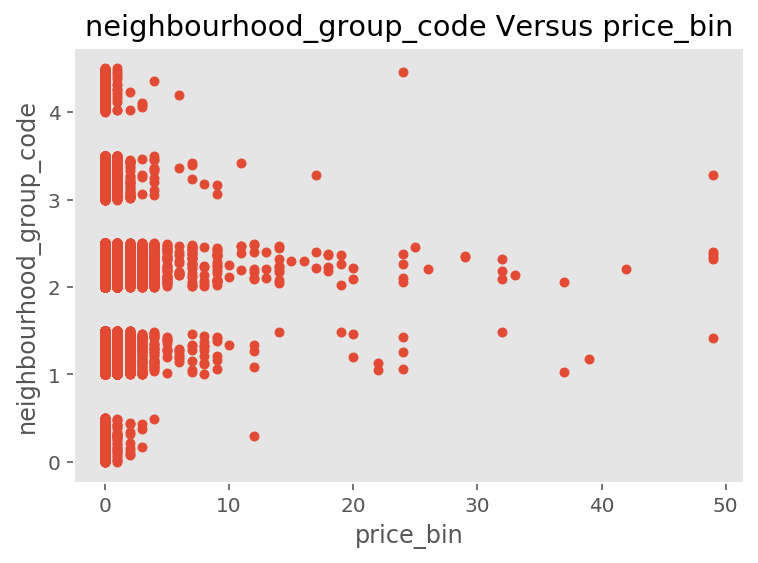

In [23]:
%matplotlib inline
X1 = df[['neighbourhood_group_code','price_bin_2']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, cmap=plt.cm.rainbow,s=20)
plt.xlabel('price_bin_2'), plt.ylabel('neighbourhood_group_code')
plt.grid()
plt.title('neighbourhood_group_code Versus price_bin')
plt.show()

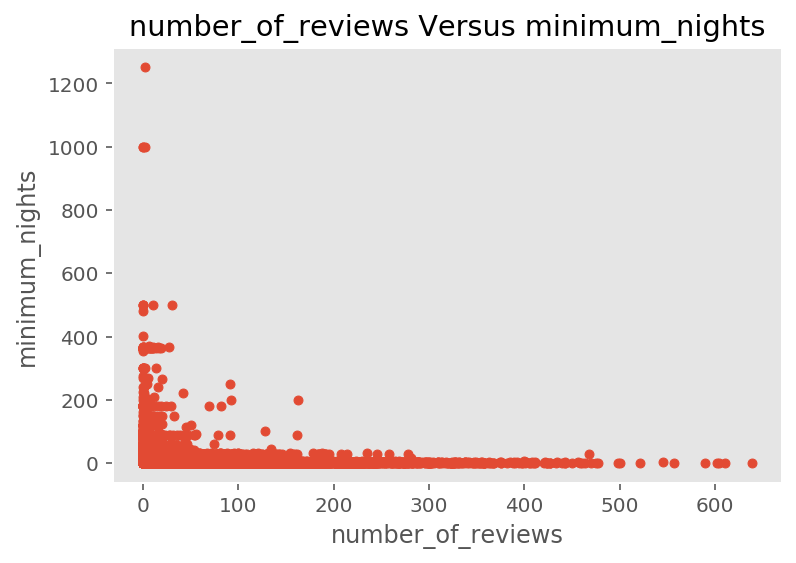

In [36]:
%matplotlib inline
X2 = df[['minimum_nights','number_of_reviews']].values

plt.scatter(X2[:, 1], X2[:, 0]+np.random.random(X2[:, 1].shape)/2, cmap=plt.cm.rainbow,s=20)
plt.xlabel('number_of_reviews'), plt.ylabel('minimum_nights')
plt.grid()
plt.title('number_of_reviews Versus minimum_nights')
plt.show()

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

X1 = df[['neighbourhood_group_code','room_type_code']]

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

y = df['price_bin']
X = df[['latitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy (with kmeans for neighbourhood_group_code/room_type_code)= ", acc.mean()*100, "+-", acc.std()*100)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Average accuracy (with kmeans for neighbourhood_group_code/room_type_code)=  82.28997133257843 +- 0.6471287830045351


In [32]:
X2 = df[['minimum_nights','number_of_reviews']]

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X2)
newfeature = cls.labels_ # the labels from kmeans clustering

y = df['price_bin']
X = df[['latitude','neighbourhood_group_code','room_type_code','calculated_host_listings_count','availability_365']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy (with kmeans for minimum_nights/number_of_reviews)= ", acc.mean()*100, "+-", acc.std()*100)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Average accuracy (with kmeans for minimum_nights/number_of_reviews)=  80.64467517466284 +- 0.6865863307351742


In [34]:
%%time
C1 =cls.fit(X1)
Feature_1 = C1.labels_
C2 = cls.fit(X2)
Feature_2 = C2.labels_

y = df['price_bin']
X = df[['latitude']]
X = np.column_stack((X,pd.get_dummies(Feature_1),pd.get_dummies(Feature_2)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Average accuracy =  76.41033806737295 +- 0.5342561575888688
CPU times: user 39.3 s, sys: 3.15 s, total: 42.5 s
Wall time: 44 s
